# Taylor's theorem: how we can verify our derivatives

How can I verify the correctness of any auto-differentiation software, or any differentiation in general when I don't have
a symbolic or closed form solution to compare to? One idea proposed by professor Ruthotto is based on the Taylor theorem. You've certainly heard of Taylor approximation or Taylor polynomials. These are all results people use based on the Taylor 
theorem itself. We'll take a look at the Taylor theorem test implemented in the one-dimensional case, and then see how it can 
be extended to multi-dimensional case with matrices as such.

### Taylor's Theorem in the one variable case

Let $k\geq1$ be an integer and let the function $f:\mathbb{R}\to\mathbb{R}$ be $k$ times differentiable at the point $a \in \mathbb{R}$. Then $\exists h_k:\mathbb{R}\to\mathbb{R}$ such that

\begin{gather}
f(x)=f(a)+f'(a)(x-a)+\frac{f''(a)(x-a)^2}{2!}+ \dots + \frac{f^{(k)}(a)(x-a)^k}{k!}+h_k(x)(x-a)^k \\\\
\lim_{x \to a}h_k(x)=0
\end{gather}


We can demonstrate how the polynomial section of Taylor's Theorem can be used to approximate functions for $f(x)=e^x$ and $f(x)=x^3$

### Function approximation with Taylor's Theorem

In [1]:
import autograd.numpy as np
import autograd as ag
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [102]:
def f(x):
    return x**3

f_grad = ag.grad(f)

def taylor_approx(x, f, k, a=0.):
    """
    Computes kth order Taylor approximation for the function f centered at point a, for all x's
    """
    y = f(a)
    grad = f
    for i in np.arange(1, k+1):
        grad = ag.grad(grad)
        y += (grad(a)*((x-a)**i)) / math.factorial(i)
    return y

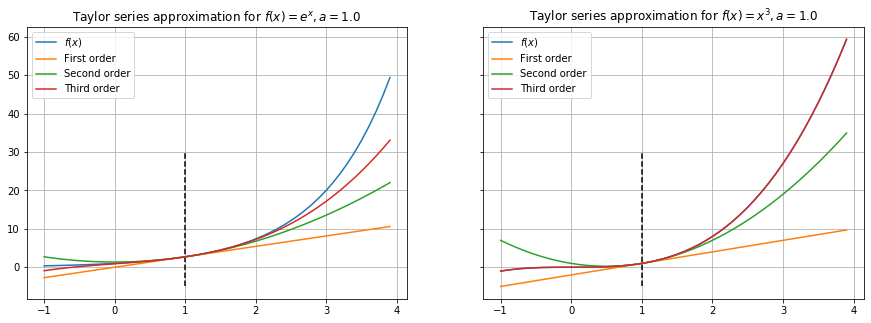

In [106]:
a = 1.
x = np.arange(-1,4,.1)
firstf = taylor_approx(x, f, k=1, a=a); secondf = taylor_approx(x, f, k=2, a=a); thirdf = taylor_approx(x, f, k=3, a=a)
first = taylor_approx(x, np.exp, k=1, a=a); second = taylor_approx(x, np.exp, k=2, a=a); third = taylor_approx(x, np.exp, k=3, a=a)

fig, ((ax1, ax2)) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
ax1.grid(b=True)
ax2.grid(b=True)
ax1.set_title("Taylor series approximation for $f(x)=e^x, a={}$".format(a))
ax1.vlines(a, -5, 30, linestyles = "dashed")
ax1.plot(x, np.exp(x), label="$f(x)$"); ax1.plot(x, first, label="First order")
ax1.plot(x, second, label="Second order"); ax1.plot(x, third, label="Third order")
ax1.legend()
ax2.set_title("Taylor series approximation for $f(x)=x^3, a={}$".format(a))
ax2.vlines(a, -5, 30, linestyles = "dashed")
ax2.plot(x, f(x), label="$f(x)$"); ax2.plot(x, firstf, label="First order")
ax2.plot(x, secondf, label="Second order"); ax2.plot(x, thirdf, label="Third order")
ax2.legend()

### Derivative test theory

Now we can think about how we can use the Taylor identity to verify our first derivative is correct. Given the Taylor Theorem, what must be true about the first derivative? Let's see how we can use algebra to rearrange the equation. Let's revisit our Taylor equation, but lump all the terms with an order higher than the first derivative into a term "c", and observe the difference between the function and the first term in the expansion. 

\begin{gather}
d_1=f(x)-f(a)=f'(a)(x-a)+c_1(x,a)
\end{gather}

What about isolating all the terms with an order less than the second derivative? That would also give us information about our first derivative.

\begin{gather}
d_2=f(x)-f(a)-f'(a)(x-a)=\frac{1}{2}f''(a)(x-a)^2+c_2(x,a)
\end{gather}

Let's say that we have a guess for what $f'(x)$ should be. We can assume that the only known quantities then are on the 
left hand side, since we just know the function $f(x)$ and have a guess at the derivative $f_{g}'(x)$. If our guess is correct, then $d2$ would look as above. What if $f_{g}'(x)$ is incorrect and we still go about computing our difference? 

\begin{gather}
\tilde{d}_{2}=f(x)-f(a)-f_{g}'(a)(x-a)=[f_{true}'(a)-f'_{g}(a)](x-a)+\frac{1}{2}f''(a)(x-a)^2+c_2(x,a)
\end{gather}

You can see that unlike the correct difference, $\tilde{d}_2$ still has a first order term in its polynomial with a coefficient equal to the error of our first derivative estimate. $\textbf{Our derivative is correct if and only if $\tilde{d}_2$ does not contain a first order term $c(x-a)$, where $c=f_{true}'(a)-f'_{g}(a)$}$

### Derivative test formalization

Let's rewrite the difference into something we can iterate over. Considering that $x$ and $a$ are separated by some distance $d$, let's write it as $x=W+hD$, and $a=W$

\begin{gather}
\tilde{d}_{2}=f(W+hD)-f(W)-f_{g}'(W)(hD)=[f_{true}'(W)-f'_{g}(W)](hD)+\frac{1}{2}f''(W)(hD)^2+c_2(hD,W)
\end{gather}

Where $h\in [0,1]$ and define $r$ as the error in our derivative guess $f_{true}'(W)-f'_{g}(W)$. $h$ allows us to control where we are in the domain between $W$ and $W+D$. We can see quickly that both the correct $d_2$ and the potentially incorrect guess $\tilde{d}_2$ are of the same order $k$, where $k$ is the number of times that $f(x)$ is differentiable, since they both contain the first order term $c_2(hD,W)$. The difference is the presence of the term $hD$. If $hD$ is present in the polynomial, then our derivative is not correct. In other words, $d_2$ should be $\Theta(h)$ (like big-$O$ notation but deals with the lower bound).

This see an example, let's look at the function $f(x)=x^3$. The differences we defined above would look as follows

\begin{gather}
d_1=3W^2(hD)+3W(hD)^2+(hD)^3\\\\ 
d_2=3W(hD)^2+(hD)^3 \\\\ 
\end{gather}

And a potentially incorrect guess for $d_2$ could be if we thought $f'(x)=2.9x^2$, rather than $f'(x)=3x^2$

\begin{gather}
\tilde{d}_2=f(W+hD)-f(W)-f_{g}'(W)(hD)=0.1W^2(hD)+3W(hD)^2+(hD)^3 \\\\ 
\end{gather}

We can see this looks very similar to $d_1$, since it has the exact same quadratic and cubic terms on $h$, with the only
difference being a smaller coefficient on the linear $h$ term. 

$\textbf{How can I tell the difference between $f(h)=ah^2$ and $g(h)=ah^2+bh$, when I don't know $a,b$}$?

### Using the $\log$ transform to detect the order in polynomials

This is where we introduce the log transformation. Suppose we have a sequence of values $h$. How does logging them change them?

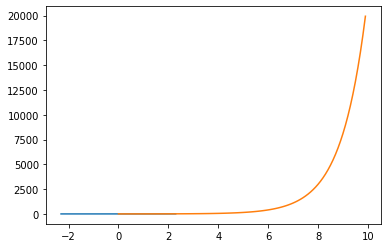

In [54]:
h = np.arange(0,10,.1)
plt.plot(np.log(h), (h))
plt.plot(h, np.exp(h))
#plt.xscale("log")

At small values of $h$, the differences becomes extremely exaggerated. At larger values of $h$, these differences become attenuated. Let's look at what transformations to the $y$ and $x$ variables would do in terms of what we see. Define $w=\log(y)$ and $z=\log(x)$

\begin{gather}
\text{Original function: } y = f(x) \\\\ 
\text{Log of Y: }w=\log f(x) \\\\ 
\text{Log of X: } y =f(e^{z}) \\\\
\text{Log of X and Y: }w=\log f(e^{z}) \\
\end{gather}

Remember, we are interested in detecting differences between $ah^2$ and $ah^2+bh$

\begin{gather}
g(h)=ah^2+bh \\\\
w=\log( a(e^z)^2+be^z)) \\ 
w=\log( e^z(ae^z+b)) \\ 
w=\log(e^z) + \log(ae^z+b) \\\\ 
w=z+\log(ae^z+b) \\
\end{gather}

Why can I ignore the higher order polynomial terms? What happens if there's now a cubic term

\begin{gather}
g(h)=ah^3+bh^2+ch \\\\
w=\log( a(e^z)^3+b(e^z)^2+ce^z) \\ 
w=\log( e^{z}(ae^{2z}+be^z+c)) \\ 
w=\log(e^z) + \log(ae^{2z}+be^z+c) \\\\ 
w=z+\log(ae^{2z}+be^z+c) \\
\end{gather}

We can now generalize this identity based on a polynomial $p(h):\mathbb{F} \to \mathbb{F}$, $h\in\mathbb{F}$ with no constant

\begin{gather}
p(h)=a_1h+a_2h^2+a_3h^3+\dots a_kh^k \\\\
w=\log(p(z)), z=\log(h) \\
w=z+\log(\sum^k_{i=1}a_ie^{z(i-1)})=z+\log(a_1+\sum^k_{i=2}a_ie^{z(i-1)}) 
\end{gather}

If we replace this identity with our variables in our problem now from the Taylor expansion, we get an interesting result. If were to graph our log difference against $\log h$, then we'd expect a line with slope of 1, and some nonlinear term (log of a summation)

\begin{gather}
\tilde{d}_2(h)=p(h)=a_1h+a_2h^2+a_3h^3+\dots a_kh^k \\\\
w=\log(\tilde{d}_2), z=\log(h) \\
w=z+\log\left([f_{true}'(W)-f'_{g}(W)]+\sum^k_{i=2}\frac{f^{(i)}(W)}{i!}e^{z(i-1)} \right) \\
\end{gather}

If the error in our derivative is 0, then it should like a line with slope 2, with some added nonlinear term that increases in value at higher values of $z$. However in our case, since $z=\log h$, $z\in(-\infty,0]$
\begin{gather}
w=2z+\log\left(\frac{f''(W)}{2}+\sum^k_{i=3}\frac{f^{(i)}(W)}{i!}e^{z(i-1)}\right)  
\end{gather}

So it looks like if our derivative is the right derivative, then a graph should look like the line that passes through the 
origin with slope 2.

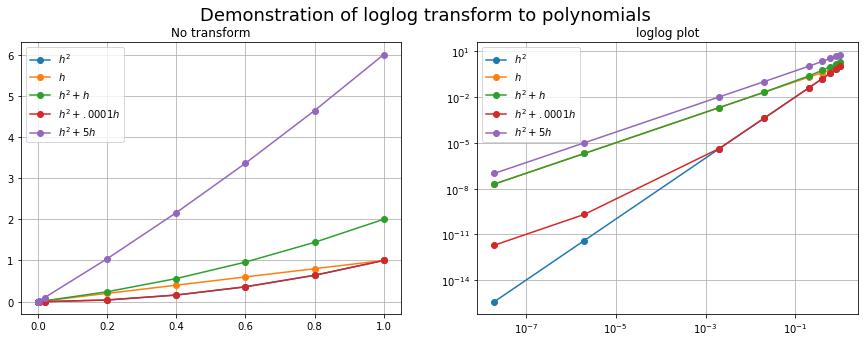

In [91]:
h = np.array([1,.8,.6,.4,2e-1,2e-2,2e-3,2e-6,2e-8])
d = 1.
w = 1.

a = 2
b = 3
c = 4

y1 = h
y2 = h**2
y3 = h**2 + h
y4 = h**2 + 1e-4*h
y5 = h**2 + 5*h

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle("Demonstration of loglog transform to polynomials", fontsize=18)
ax1.grid(b=True)
ax1.plot(h, y2, label="$h^2$", marker="o")
ax1.plot(h, y1, label="$h$", marker="o")
ax1.plot(h, y3, label="$h^2+h$", marker="o")
ax1.plot(h, y4, label="$h^2+.0001h$", marker="o")
ax1.plot(h, y5, label="$h^2+5h$", marker="o")
ax1.set_title("No transform")
ax1.legend()
ax2.grid(b=True)
ax2.plot(h, y2, label="$h^2$", marker="o")
ax2.plot(h, y1, label="$h$", marker="o")
ax2.plot(h, y3, label="$h^2+h$", marker="o")
ax2.plot(h, y4, label="$h^2+.0001h$", marker="o")
ax2.plot(h, y5, label="$h^2+5h$", marker="o")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_title("loglog plot")
ax2.legend()

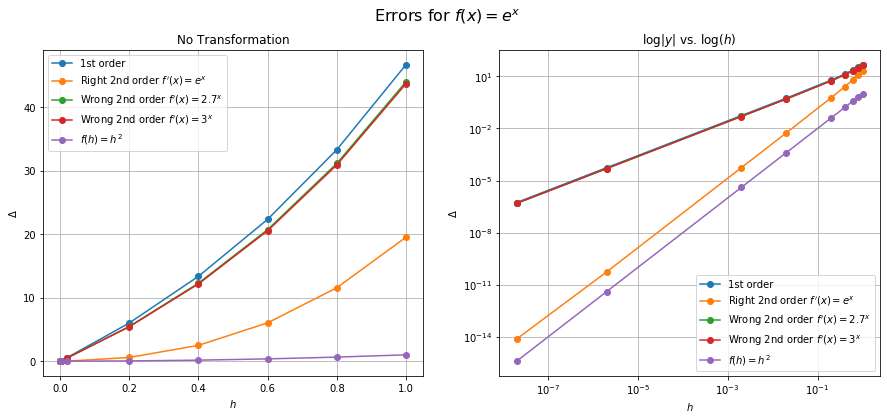

In [95]:
def f(x):
    return 10*np.exp(x)

def f_grad(x):
    return 10*np.exp(x)

def f_grad_wrong(x):
    return 2.7**x

def f_grad_really_wrong(x):
    return 3**x

# BLUE - first order 
d1 = f(w+h*d)-f(w)
# ORANGE - right second order
d2 = f(w+h*d)-f(w)-f_grad(w)*(h*d)
# GREEN - wrong second order
d3 = f(w+h*d)-f(w)-f_grad_wrong(w)*(h*d)
# RED - really wrong second order
d4 = f(w+h*d)-f(w)-f_grad_really_wrong(w)*(h*d)

# Actual plot
l1 = "1st order"
l2 = "Right 2nd order $f'(x)=e^x$"
l3 = "Wrong 2nd order $f'(x)=2.7^x$"
l4 = "Wrong 2nd order $f'(x)=3^x$"

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle("Errors for $f(x)=e^x$", fontsize=16)
ax1.grid(b=True)
ax2.grid(b=True)
ax1.set_title("No Transformation")
ax1.plot(h, d1, marker="o",label=l1) 
ax1.plot(h, d2, marker="o", label=l2)
ax1.plot(h, d3, marker="o", label=l3)
ax1.plot(h, d4, marker="o", label=l4)
ax1.plot(h, h**2, marker="o", label="$f(h)=h^2$")
ax1.set_ylabel("$\Delta$")
ax1.set_xlabel("$h$")
ax1.legend()

ax2.set_title("$\log|y|$ vs. $\log(h)$")
ax2.plot(h, np.abs(d1), marker="o",label=l1) 
ax2.plot(h, np.abs(d2), marker="o", label=l2)
ax2.plot(h, np.abs(d3), marker="o", label=l3)
ax2.plot(h, np.abs(d4), marker="o", label=l4)
ax2.plot(h, h**2, marker="o", label="$f(h)=h^2$")
ax2.set_ylabel("$\Delta$")
ax2.set_xlabel("$h$")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.legend()